In [38]:
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # @UnusedImport

import numpy as np

In [39]:
def cone_maker(stretch,offset):
    z = stretch*np.arange(0, 1, 0.1)
    
    a=[None for _ in xrange(len(z))]

    for ix,zval in enumerate(z):
    
        n=int(zval*100/stretch)
    
        xrand=np.random.uniform(-zval,zval,size=n)
        yrand=np.random.uniform(-zval,zval,size=n)
    
        xy=np.vstack((xrand,yrand)).T
        xy_cut = xy[ np.sqrt(np.power(xy[:,0],2) + np.power(xy[:,1],2)) < zval  ]
    
        zvals=zval*np.ones(xy_cut.shape[0])
    
        a[ix]=np.vstack((xy_cut[:,0]+offset[0],
                         xy_cut[:,1]+offset[1],
                         zvals+offset[2]))
        
    return np.concatenate(tuple(a[1:]),axis=1).T

In [40]:
cone1=cone_maker(stretch=100.0,offset=(50,50,50))

In [41]:
def rx(t):
    return np.array([[1,0,0],[0,np.cos(t),-1.0*np.sin(t)],[0,np.sin(t),np.cos(t)]])
def ry(t):
    return np.array([[np.cos(t),0,np.sin(t)],[0,1,0],[-1.0*np.sin(t),0,np.cos(t)]])
def rz(t):
    return np.array([[np.cos(t),-1.0*np.sin(t),0],[np.sin(t),np.cos(t),0.0],[0,0,1]])

In [43]:
cone2=[]
for pt in cone1:
    cone2.append(np.dot(rx(120*np.pi/180.0),pt))
cone2=np.array(cone2)

cone3=[]
for pt in cone2:
    cone3.append(np.dot(ry(45*np.pi/180.0),pt))
cone3=np.array(cone3)


In [16]:
fig = plt.figure()
axes1 = fig.add_subplot(111, projection='3d')

axes1.plot(cone1[:,0],
           cone1[:,1],
           cone1[:,2],
           'o',color='blue')

axes1.plot(cone2[:,0],
           cone2[:,1]+80.0,
           cone2[:,2]+10.0,
           'o',color='green')

axes1.plot(cone3[:,0],
           cone3[:,1]+80.0,
           cone3[:,2]-100.0,
           'o',color='red')


axes1.set_xlabel("x label")
axes1.set_ylabel("y label")
axes1.set_zlabel("z label")

#axes1.set_xlim(250,750)
#axes1.set_ylim(-250,750-250)
#axes1.set_zlim(400,900)
axes1.autoscale()
plt.grid()
plt.show()

In [44]:
from larlite import larlite as ll
from larlite import larutil as lu

In [45]:
geoH=lu.GeometryHelper.GetME()
geo =lu.Geometry.GetME()

In [46]:
cone1[0]

array([ 51.6124024 ,  45.05768856,  60.        ])

In [47]:
import ROOT;

In [48]:
k=ROOT.std.vector("double")()
k.resize(3)
k[0] = cone1[1][0]
k[1] = cone1[1][1]
k[2] = cone1[1][2]

In [49]:
plane0_c1=[[0.0,0.0] for _ in xrange(cone1.shape[0])]
plane1_c1=[[0.0,0.0] for _ in xrange(cone1.shape[0])]
plane2_c1=[[0.0,0.0] for _ in xrange(cone1.shape[0])]

plane0_c2=[[0.0,0.0] for _ in xrange(cone1.shape[0])]
plane1_c2=[[0.0,0.0] for _ in xrange(cone1.shape[0])]
plane2_c2=[[0.0,0.0] for _ in xrange(cone1.shape[0])]

plane0_c3=[[0.0,0.0] for _ in xrange(cone1.shape[0])]
plane1_c3=[[0.0,0.0] for _ in xrange(cone1.shape[0])]
plane2_c3=[[0.0,0.0] for _ in xrange(cone1.shape[0])]

In [50]:
for ix,pt in enumerate(cone1):
    k.clear()
    k.resize(3)
    k[0] = pt[0]
    k[1] = pt[1]
    k[2] = pt[2]
    p0=geoH.Point_3Dto2D(k.data(),0) 
    p1=geoH.Point_3Dto2D(k.data(),1)
    p2=geoH.Point_3Dto2D(k.data(),2)
    
    plane0_c1[ix][0] = p0.w
    plane0_c1[ix][1] = p0.t
    plane1_c1[ix][0] = p1.w
    plane1_c1[ix][1] = p1.t
    plane2_c1[ix][0] = p2.w
    plane2_c1[ix][1] = p2.t
    
for ix,pt in enumerate(cone2):    
    k.clear()
    k.resize(3)
    k[0] = pt[0]
    k[1] = pt[1]
    k[2] = pt[2]
    p0=geoH.Point_3Dto2D(k.data(),0) 
    p1=geoH.Point_3Dto2D(k.data(),1)
    p2=geoH.Point_3Dto2D(k.data(),2)
    
    plane0_c2[ix][0] = p0.w
    plane0_c2[ix][1] = p0.t
    plane1_c2[ix][0] = p1.w
    plane1_c2[ix][1] = p1.t
    plane2_c2[ix][0] = p2.w
    plane2_c2[ix][1] = p2.t
    
for ix,pt in enumerate(cone3):    
    k.clear()
    k.resize(3)
    k[0] = pt[0]
    k[1] = pt[1]
    k[2] = pt[2]
    p0=geoH.Point_3Dto2D(k.data(),0) 
    p1=geoH.Point_3Dto2D(k.data(),1)
    p2=geoH.Point_3Dto2D(k.data(),2)
    
    plane0_c3[ix][0] = p0.w
    plane0_c3[ix][1] = p0.t
    plane1_c3[ix][0] = p1.w
    plane1_c3[ix][1] = p1.t
    plane2_c3[ix][0] = p2.w
    plane2_c3[ix][1] = p2.t

In [51]:
p0_c1=np.array(plane0_c1)
p1_c1=np.array(plane1_c1)
p2_c1=np.array(plane2_c1)
p0_c2=np.array(plane0_c2)
p1_c2=np.array(plane1_c2)
p2_c2=np.array(plane2_c2)
p0_c3=np.array(plane0_c3)
p1_c3=np.array(plane1_c3)
p2_c3=np.array(plane2_c3)

In [52]:
%matplotlib inline

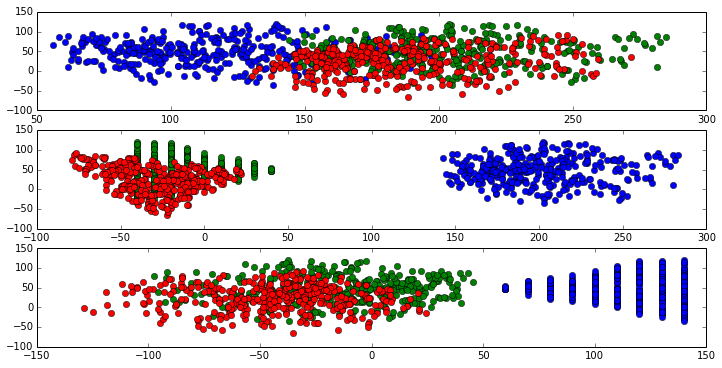

In [53]:
fix,ax=plt.subplots(figsize=(12,6))
ax=plt.subplot(3,1,1)
ax.plot(p0_c1[:,0],p0_c1[:,1],'o')
ax.plot(p0_c2[:,0],p0_c2[:,1],'o')
ax.plot(p0_c3[:,0],p0_c3[:,1],'o')

ax=plt.subplot(3,1,2)
ax.plot(p1_c1[:,0],p1_c1[:,1],'o')
ax.plot(p1_c2[:,0],p1_c2[:,1],'o')
ax.plot(p1_c3[:,0],p1_c3[:,1],'o')

ax=plt.subplot(3,1,3)
ax.plot(p2_c1[:,0],p2_c1[:,1],'o')
ax.plot(p2_c2[:,0],p2_c2[:,1],'o')
ax.plot(p2_c3[:,0],p2_c3[:,1],'o')

plt.show()